## Dataset Selection
---
We selected Wine collection as our Dataset

In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

data = datasets.load_wine(as_frame=True)

In [2]:
X = data.data
y = data.target

#### Panda Dataframe conversion

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)
df['wine_class'] = y
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  wine_class  
0                          3.92   1065.0           0  
1                          3.40   1050.0           0  
2                          3.17   1185.0           0  
3                          3.45   1480.0           0  
4                          2.93    735.0           0

## Plotting the Graph
---
We used PairPlot as the graph for identifying which SKLearn Algo should be used.
After taking a glimpse on the plotted graphs, we came to a conclusion of using KNN ALgo to predict.

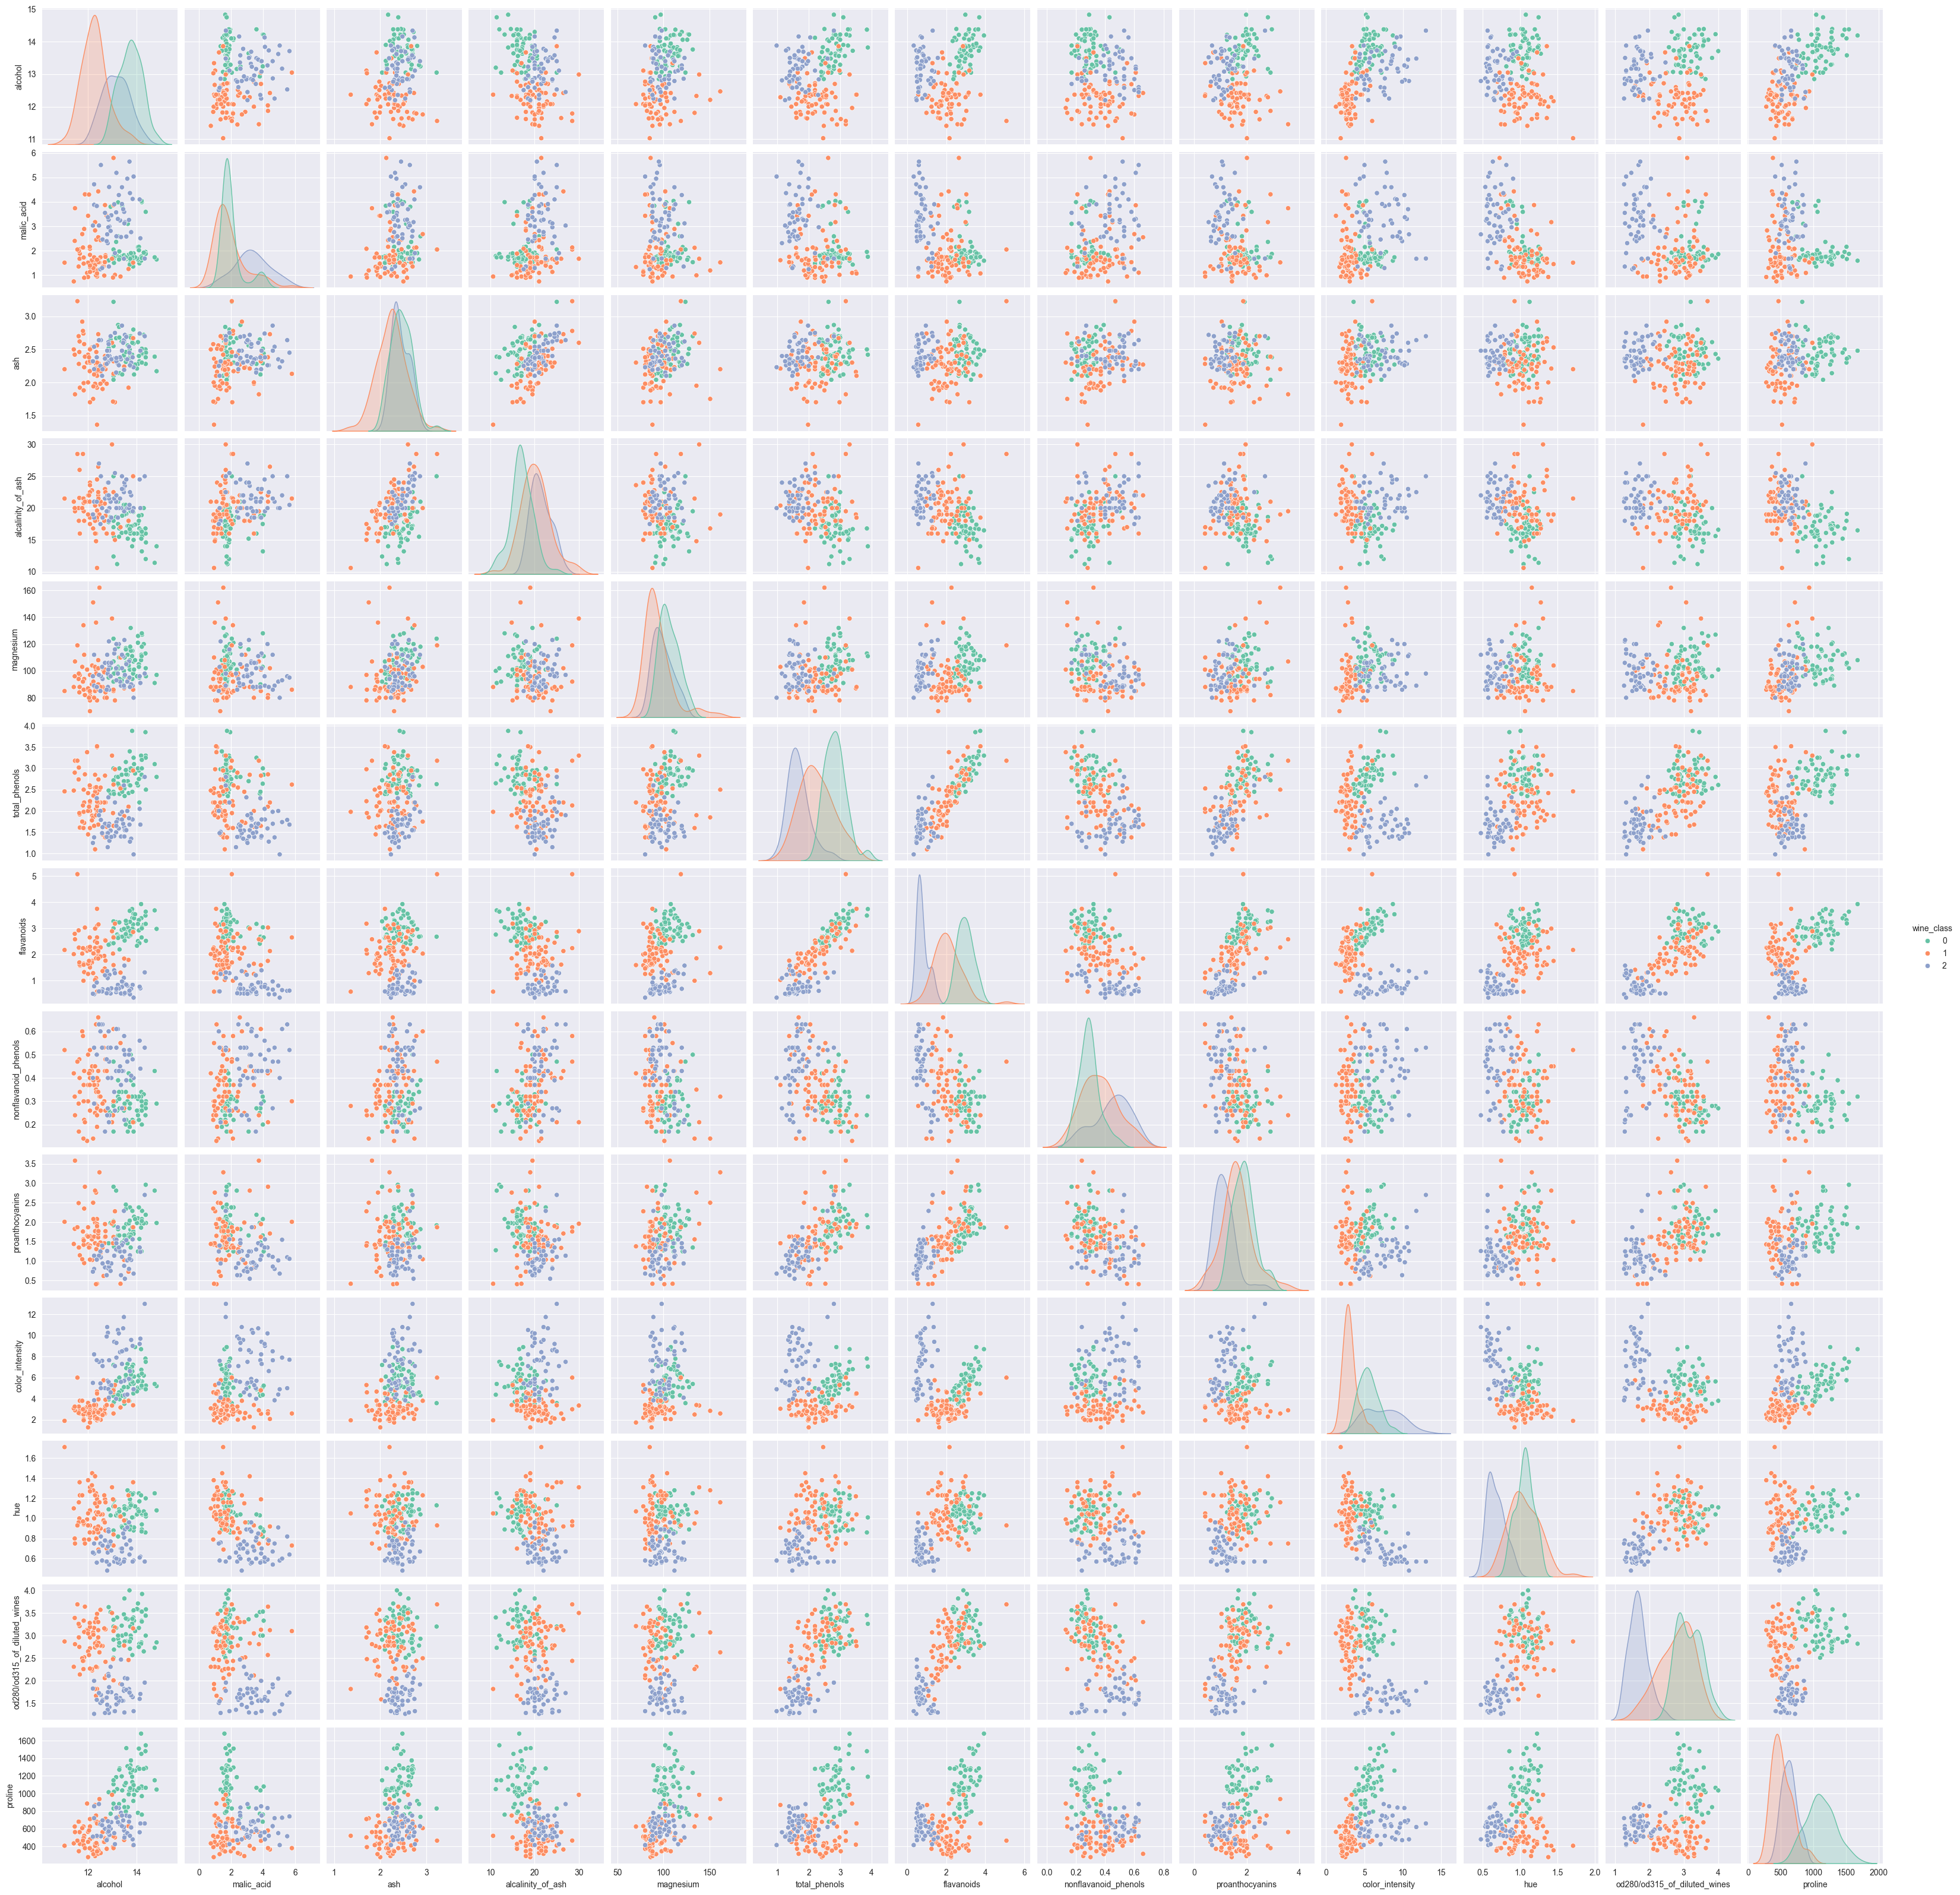

In [4]:
sns.pairplot(data=df, hue='wine_class', palette='Set2')

#### Training and Testing Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### Importing **KNN**

In [6]:
from sklearn.neighbors import KNeighborsClassifier

* for KNN, we need **n_neighbors** to provide, which gives the best possible answer when taken a sqrt of train data length

In [7]:
import math
math.sqrt(len(y_train))

11.135528725660043

#### Without Scaling

In [8]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [9]:
# calculating Accuracy score
from sklearn import metrics
metrics.accuracy_score(y_test, pred)

0.6296296296296297

#### Using Standard Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [11]:
knn1 = KNeighborsClassifier(n_neighbors=5,metric= 'euclidean')
knn1.fit(X_train,y_train)
pred2 = knn1.predict(X_test)

In [12]:
metrics.accuracy_score(y_test, pred2)

0.9629629629629629

#### Using MinMax Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [14]:
knn2 = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knn2.fit(X_train,y_train)
pred3 = knn2.predict(X_test)

In [15]:
metrics.accuracy_score(y_test, pred3)

0.9814814814814815